## HW7 Deep learning
### Zhuoran Hou zh105

Train a deep learning model to classify beetles, cockroaches and dragonflies using these images(https://www.dropbox.com/s/fn73sj2e6c9rhf6/insects.zip?dl=0). Note: Original images from https://www.insectimages.org/index.cfm. Blog about this, and explain how the neural network classified the images.

### How the neural network classified the images

Details shown in the related blog.

### Explore the dataset

In [36]:
# Importing all necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
import pathlib

In [38]:
data_train_dir = pathlib.Path('D:\\3.Duke\\course\\Year_2\\semester_1\\2_Bios823\\HW\\HW7\\insects\\train')

In [39]:
data_test_dir = pathlib.Path('D:\\3.Duke\\course\\Year_2\\semester_1\\2_Bios823\\HW\\HW7\\insects\\test')

In [40]:
data_train_dir

WindowsPath('D:/3.Duke/course/Year_2/semester_1/2_Bios823/HW/HW7/insects/train')

In [41]:
image_count = len(list(data_train_dir.glob('*/*.jpg')))
print(image_count)

1019


In [42]:
image_count = len(list(data_test_dir.glob('*/*.jpg')))
print(image_count)

180


There are 1019 figures for training and 180 figures for testing.<br>
<br>
Let's take a look at the a sample figure.

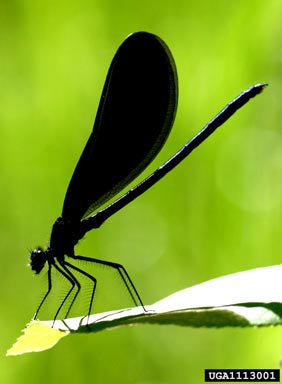

In [43]:
dragonflies = list(data_train_dir.glob('dragonflies/*'))
PIL.Image.open(str(dragonflies[0]))

### Load using keras.preprocessing

In [ ]:
img_width, img_height = 256, 224
batch_size = 32

In [44]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1019 files belonging to 3 classes.


In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 180 files belonging to 3 classes.


In [46]:
class_names = train_ds.class_names
print(class_names)

['beetles', 'cockroach', 'dragonflies']


In [48]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 256, 3)
(32,)


The image_batch is a tensor of the shape (32, 224, 256, 3). This is a batch of 32 images of shape 224x256x3

### Standardize the data

In [49]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [50]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9191305


### Create the model

In [51]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

I choose the optimizers.Adam optimizer and losses.SparseCategoricalCrossentropy loss function. 

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 32, 64)        0

### Train the model

In [54]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 36s 1s/step - loss: 0.9313 - accuracy: 0.6340 - val_loss: 0.6570 - val_accuracy: 0.7667
Epoch 2/10
32/32 [==============================] - 37s 1s/step - loss: 0.4232 - accuracy: 0.8469 - val_loss: 0.5344 - val_accuracy: 0.8167
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.3108 - accuracy: 0.8803 - val_loss: 0.2941 - val_accuracy: 0.8944
Epoch 4/10
32/32 [==============================] - 35s 1s/step - loss: 0.1886 - accuracy: 0.9274 - val_loss: 0.1562 - val_accuracy: 0.9389
Epoch 5/10
32/32 [==============================] - 36s 1s/step - loss: 0.1031 - accuracy: 0.9617 - val_loss: 0.1012 - val_accuracy: 0.9611
Epoch 6/10
32/32 [==============================] - 36s 1s/step - loss: 0.0704 - accuracy: 0.9725 - val_loss: 0.0514 - val_accuracy: 0.9889
Epoch 7/10
32/32 [==============================] - 37s 1s/step - loss: 0.0435 - accuracy: 0.9902 - val_loss: 0.0399 - val_accuracy: 0.9944
Epoch 8/10
32/32 [==

### Visualize training results

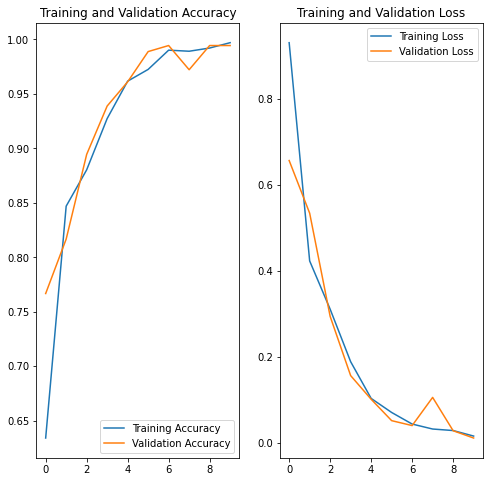

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model achieved quite high accuracy (**99.44%**)

### Save the model

In [57]:
model.save_weights('model_saved.h5')

### Reference

1.https://www.tensorflow.org/tutorials/images/classification <br>
2.https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/